## Important  Code Parts used in: 

## Ref. 1: Estimating temperatures of heated Lower Palaeolithic flint artefacts, A. Agam, I. Azuri, I. Pinkas, A. Gopher, and F. Natalio, Nat Hum Behav (2020)

## Ref. 2: Z. Stepka, I. Azuri, L. Kolska Horwitz, M. Chazan, and F. Natalio, PNAS (2022)

## The code was writen by Ido Azuri 


In [ ]:
# Improting Python packages
import numpy as np # NumPy package for working with arrays, mathematical operations and linear algebra
import pandas as pd # Pandas package for working with Data Frames
import sklearn # Sklearn package for machine learning
import rampy as rp # Rampy package for spectra preprocessing. Should be installed.
import scipy # SciPy package for using the interp1d interpolation function 
import matplotlib # Matplotlib packagae for plotting and visualization
import matplotlib.pyplot as plt
import keras # Keras package for Deep Learning. Should be installed.
from scipy.interpolate import interp1d

Using TensorFlow backend.


### The following package versions were used in that project

NumPy version is:  1.15.4
<br>
Pandas version is:  0.24.2
<br>
Sklearn version is:  0.21.1
<br>
Scipy version is:  1.2.1
<br>
Matplotlib version is:  3.0.3
<br>
Keras version is:  2.2.2

In [ ]:
# Printing your current versions
print('NumPy version is: ', np.__version__)
print('Pandas version is: ', pd.__version__)
print('Sklearn version is: ', sklearn.__version__)
print('Scipy version is: ', scipy.__version__)
print('Matplotlib version is: ', matplotlib.__version__)
print('Keras version is: ', keras.__version__)

NumPy version is:  1.15.4
Pandas version is:  0.24.2
Sklearn version is:  0.21.1
Scipy version is:  1.2.1
Matplotlib version is:  3.0.3
Keras version is:  2.2.2


## Preprocessing the spectra

### For preprocessing the spectra the following steps applied:
### 1. Interpolating the spectra
For each set of spectra recording, the wave numbers are a little bit different. For the input to the machine learning/ deep learning models the intensities should be at fixed wave numbers for all spectra from all sets recordings. For this the spectra intensities are interpolated for a fixed given wave numbers. 
### 2. Smoothing
This step is for noise reduction. The number of points that are choosen in step 1 should be not small enough, so most of the information is kept and not too high, so the smoothing will be effective as much as possible.
### 3. Baseline correction
To correct distorted measuremets.
### 4. Intesity normalization
To put the spectra on the same scale.

## Note, here the steps are applied only on one set of measurements ("spec_1p2_control.txt") for demonstration. But the same pipline was applied on all the other spectra and supplied in the running folder as csv file as "data_set_processed.csv"

## 1. Interpolating the spectra

In [ ]:
# Reading an example set of spectra records. 10 Spectra.
temperature_control = []        
spec = pd.read_csv('spec_1p2_control.txt', header=None, sep='\t', comment='#')
temperature_control.append(spec)

In [ ]:
# Define number of points to interpolate and number of spectra in that set
Num_Points = 1000
Num_Spec = 10

# Minimum and Maximum wave numbers for the interpolation 
min_point_inter = 102
max_point_inter = 1798

print('Interpolate, with '+str(Num_Points)+' Points...')

Int_control = np.zeros((Num_Spec,Num_Points))

freq_min = []
freq_max = []

# Fucntion for the interpolation and getting more information
def Int_DF(DF):
    DF_array = np.zeros((Num_Spec,Num_Points))
    spec = DF[0]
    spec.drop(0, axis=1, inplace=True)
    freq = spec.iloc[0]
    freq_min.append(min(freq))
    freq_max.append(max(freq))
    # Getting the wave numbers
    x = np.array(freq)
    # Getting the intensities
    y = np.array(spec.iloc[1:])
    # Define the interpolation function, f
    f = interp1d(x, y, kind='linear')
    
    # Define the fixed wave numbers to interpolate
    xnew = np.linspace(min_point_inter, max_point_inter, num=Num_Points, endpoint=True)
    # Getting the interplated intensities
    fnew = f(xnew) 
    DF_array[:,:] = fnew
    return DF_array

interpolate_control = Int_DF(temperature_control)


Interpolate, with 1000 Points...


In [ ]:
print('Shape is', interpolate_control.shape, 'for 10 spectra of 1000 intensity wavenumbers')
interpolate_control

Shape is (10, 1000) for 10 spectra of 1000 intensity wavenumbers


array([[130.69392925, 130.1319921 , 139.23162577, ..., 353.28214168,
        353.10452591, 363.35271942],
       [112.06032122, 114.58797383, 118.96778391, ..., 274.85820853,
        282.26451692, 275.62644604],
       [ 97.63984818, 104.38498896, 103.21713313, ..., 254.70140414,
        236.63109791, 246.68595683],
       ...,
       [137.04039324, 162.71691427, 161.42904807, ..., 398.19833827,
        382.5191772 , 372.2981295 ],
       [104.49542862,  88.55588023, 102.030263  , ..., 187.11373736,
        187.55261582, 186.03920144],
       [148.07334481, 153.10343629, 162.33866208, ..., 577.35182014,
        576.8695833 , 567.04711511]])

## Steps 2 - 4

In [ ]:
# Choosing the smoother
smooth_method = "GCVSmoothedNSpline"
# Choosing the baseline method
baseline_method = "als"
# Choosing the normalization method
norm_method = "intensity"

print('Smoothing...\nBase correction...\nNormalization...')

freq_inter = np.linspace(min_point_inter, max_point_inter, num=Num_Points, endpoint=True)

interpolate_control_smooth = np.zeros((Num_Spec,Num_Points))

interpolate_control_base = np.zeros((Num_Spec,Num_Points))

for k in range(Num_Spec):
    # smoothing
    interpolate_control_smooth[k,:] = rp.smooth(freq_inter, interpolate_control[k,:], method=smooth_method)
    corr_spec, base = rp.baseline(freq_inter, interpolate_control_smooth[k,:], bir = np.array([[min_point_inter, max_point_inter]]), method=baseline_method)
    interpolate_control_base[k,:] = rp.normalise(corr_spec[:,0], method=norm_method)

Smoothing...
Base correction...
Normalization...


## Printing the spectra

Spectrum Number =  1


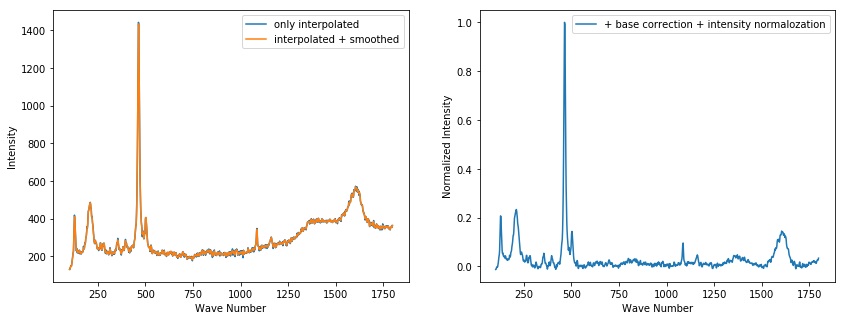

Spectrum Number =  2


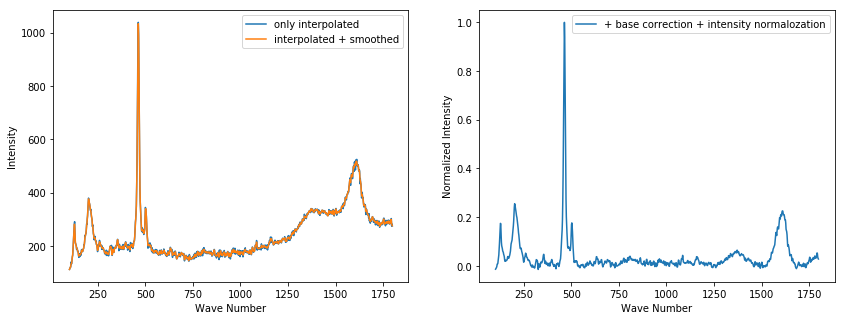

Spectrum Number =  3


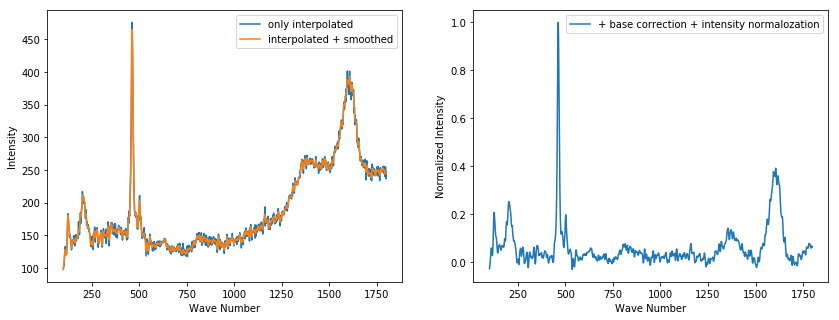

Spectrum Number =  4


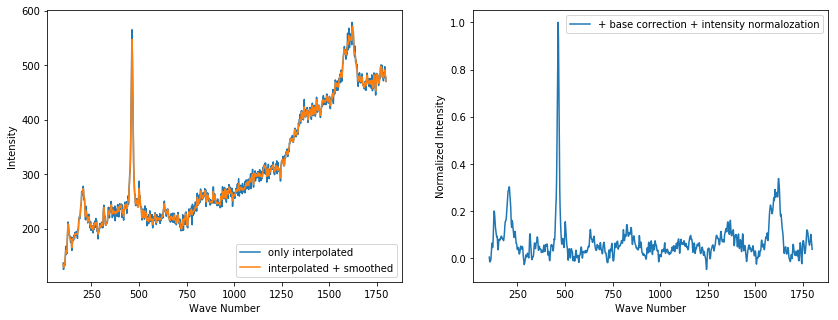

Spectrum Number =  5


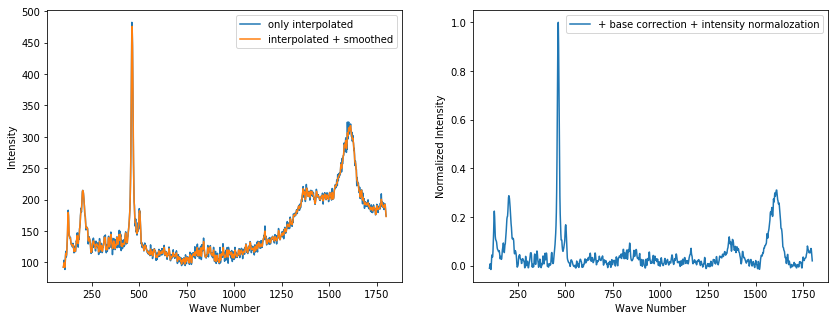

Spectrum Number =  6


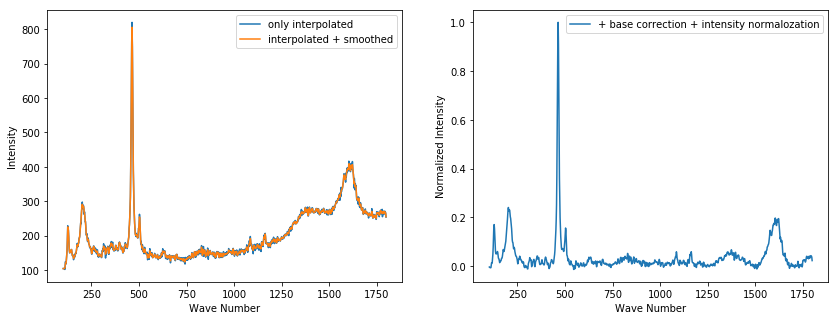

Spectrum Number =  7


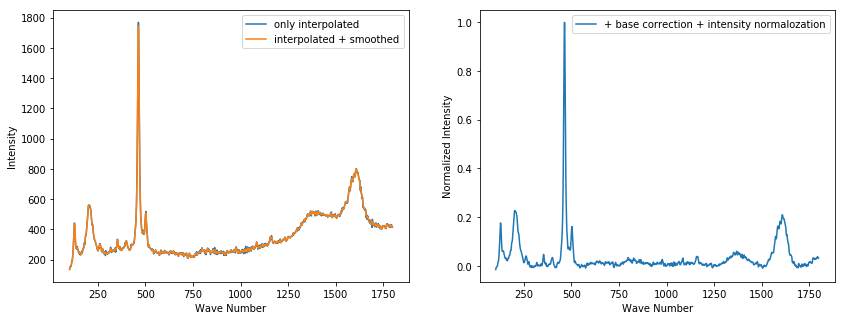

Spectrum Number =  8


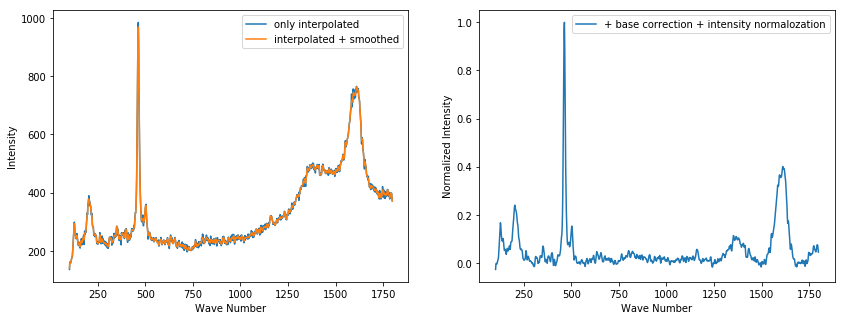

Spectrum Number =  9


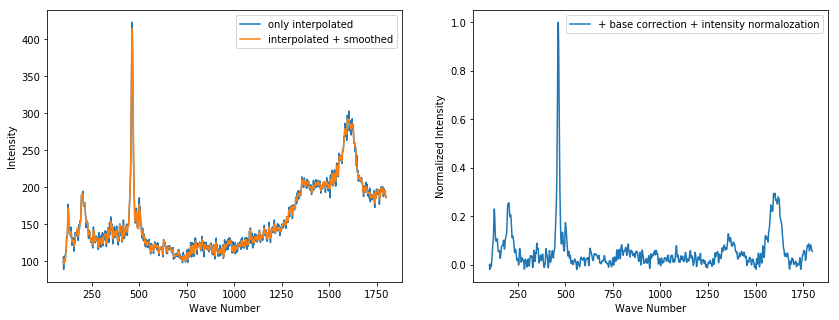

Spectrum Number =  10


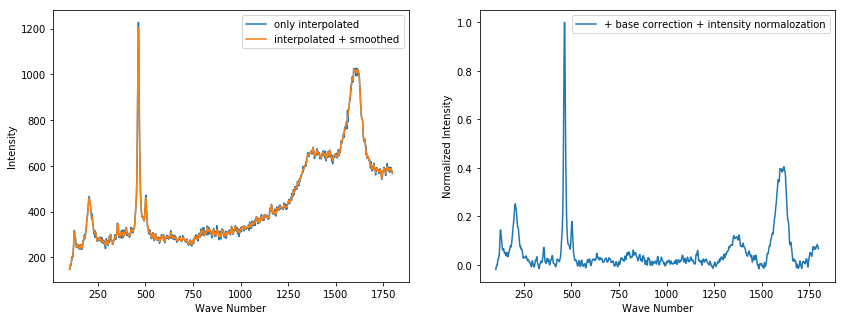

In [ ]:
arr_plot = interpolate_control
arr_plot_smooth = interpolate_control_smooth
arr_plot_base = interpolate_control_base

for idx_plt in range(arr_plot.shape[0]):
    
    print('Spectrum Number = ', idx_plt + 1)
    
    fig = plt.figure(figsize=[14,5])
    
    plt.subplot(1,2,1)
    plt.plot(freq_inter, arr_plot[idx_plt,:])
    plt.plot(freq_inter, arr_plot_smooth[idx_plt,:])
    plt.xlabel('Wave Number')
    plt.ylabel('Intensity')
    plt.legend(['only interpolated','interpolated + smoothed'])
    
    plt.subplot(1,2,2)
    plt.plot(freq_inter, arr_plot_base[idx_plt,:])
    plt.xlabel('Wave Number')
    plt.ylabel('Normalized Intensity')
    plt.legend(['+ base correction + intensity normalozation'])
    
    plt.show()

## Machine Learning and Deep Learning example - Regression case

Here, the processed data set is loaded (data_set_processed.csv).
In this work we used models from Sklearn Python package and artificial neural network models with Keras. Here we demonstrate the artificial neural network cases (FC-ANN and 1D-CNN).

## Fully Connected Artificial Neural Network (FC-ANN) 

In [ ]:
data_set_processed = pd.read_csv('data_set_processed.csv', index_col=False)
data_set_processed = data_set_processed.drop('Unnamed: 0', axis=1)

In [ ]:
# Printing the first 15 rows. 
# The first column (Temperature) is the corresponding temperature of the flint.
# The second column (Site) is the site of the flint.
# The third column to the end are the intensities for the given wave mumbers in the columns.
# Each row is a spectrum intensities that measured on different position on the flint, or different flint (next cycle of temperatures in the data frame, index location is 614 in data frame)
print('First 15 spectra')
data_set_processed.head(n=15)

First 15 spectra


,Temperature,Site,102.0,103.69769769769769,105.3953953953954,107.09309309309309,108.7907907907908,110.48848848848849,112.18618618618619,113.88388388388388,...,1782.7207207207207,1784.4184184184182,1786.116116116116,1787.8138138138138,1789.5115115115113,1791.2092092092091,1792.906906906907,1794.6046046046044,1796.3023023023022,1798.0
0,25.0,1p2,-0.012292,-0.011842,-0.007465,-0.003505,-0.001429,-0.003077,-0.001310,0.006088,...,0.015622,0.012814,0.012813,0.018517,0.022626,0.025166,0.027512,0.025726,0.026670,0.033885
1,25.0,1p2,-0.013368,-0.010760,-0.008076,-0.005961,-0.001150,0.007224,0.007623,0.010503,...,0.032426,0.031131,0.034810,0.039137,0.047608,0.053405,0.049772,0.035942,0.031170,0.028393
2,25.0,1p2,-0.027626,-0.016355,-0.004911,0.014018,0.036098,0.052543,0.058584,0.048890,...,0.074217,0.073974,0.073997,0.066820,0.061103,0.057657,0.063044,0.067270,0.061110,0.062539
3,25.0,1p2,0.004457,-0.012786,-0.015940,-0.013457,-0.011056,-0.003394,0.019281,0.048494,...,0.059660,0.054990,0.063700,0.074182,0.092492,0.101047,0.088047,0.070655,0.055578,0.037556
4,25.0,1p2,-0.011162,-0.001295,0.006942,-0.002136,-0.016053,-0.015900,0.008523,0.036462,...,0.054761,0.058250,0.051945,0.053737,0.063896,0.070222,0.066811,0.050408,0.032525,0.019348
5,25.0,1p2,-0.004098,-0.005436,-0.006515,-0.006763,-0.007309,-0.006757,0.003772,0.013279,...,0.040468,0.036235,0.032356,0.036683,0.041315,0.042480,0.040140,0.040184,0.035112,0.022191
6,25.0,1p2,-0.014666,-0.008894,-0.005145,-0.004500,-0.003464,-0.001356,0.006332,0.013335,...,0.027557,0.027315,0.032000,0.031963,0.030766,0.034670,0.037801,0.035088,0.033629,0.031984
7,25.0,1p2,-0.026705,-0.007217,-0.001540,-0.003876,-0.004228,0.000315,0.006525,0.011742,...,0.048667,0.046207,0.050753,0.058523,0.069168,0.075029,0.075713,0.071759,0.059804,0.045134
8,25.0,1p2,-0.002523,-0.019978,-0.009437,0.001380,-0.003856,-0.009849,-0.003517,0.014523,...,0.056632,0.058423,0.073419,0.080467,0.081507,0.077441,0.070977,0.061725,0.056830,0.054003
9,25.0,1p2,-0.018860,-0.012546,-0.005785,-0.002119,-0.002583,0.002044,0.014652,0.023096,...,0.065439,0.069314,0.073883,0.076044,0.081760,0.084361,0.080330,0.075904,0.072409,0.066766


In [ ]:
# Printing the last 15 rows. 
print('Last 15 spectra')
data_set_processed.tail(n=15)

Last 15 spectra


,Temperature,Site,102.0,103.69769769769769,105.3953953953954,107.09309309309309,108.7907907907908,110.48848848848849,112.18618618618619,113.88388388388388,...,1782.7207207207207,1784.4184184184182,1786.116116116116,1787.8138138138138,1789.5115115115113,1791.2092092092091,1792.906906906907,1794.6046046046044,1796.3023023023022,1798.0
1614,800.0,ZM,-0.003203,-0.003831,-0.007236,-0.005806,-0.004321,-0.003271,-0.002064,0.004700,...,0.001720,0.002588,0.003281,0.002449,0.003775,0.004645,0.004813,0.003138,0.002214,0.001101
1615,800.0,ZM,-0.006793,-0.008416,-0.005458,-0.003642,-0.001945,-0.002676,0.002618,0.006962,...,0.002735,0.002354,0.001212,0.001437,0.002978,0.003815,0.004125,0.003483,0.003414,0.002441
1616,800.0,ZM,-0.002348,-0.004522,-0.001776,-0.004606,-0.004204,-0.006719,-0.005040,0.001842,...,0.004342,0.004736,0.004317,0.005699,0.004512,0.001104,0.002796,0.005881,0.002144,0.000278
1617,800.0,ZM,-0.006888,-0.009905,-0.008835,-0.001404,-0.000500,-0.001086,0.000727,0.004195,...,0.004427,0.003144,0.000938,0.002214,0.001754,0.001783,0.002783,0.003635,0.003207,0.001988
1618,800.0,ZM,-0.006851,-0.005723,-0.005113,-0.003475,-0.002750,-0.003494,-0.003452,0.003255,...,0.002181,0.002116,0.001988,0.001683,0.001654,0.002421,0.003148,0.001233,0.000355,-0.000764
1619,800.0,ZM,-0.004763,-0.008816,-0.007666,-0.004060,-0.001954,-0.000762,0.000585,0.001865,...,0.003618,0.002763,0.003059,0.004462,0.003322,0.003545,0.003261,0.003426,0.002950,0.001524
1620,800.0,ZM,-0.005458,-0.008437,-0.006532,-0.001462,-0.002117,-0.003665,0.000277,0.002648,...,0.002737,0.002703,0.002303,0.003582,0.003514,0.003390,0.003394,0.005298,0.003674,0.003272
1621,800.0,ZM,-0.004131,-0.005980,-0.004039,-0.003734,-0.004880,-0.004966,0.000060,0.005566,...,0.000561,-0.000706,0.002280,0.002460,0.001905,0.001146,0.002015,0.001986,0.001855,0.001861
1622,800.0,ZM,-0.008291,-0.004990,-0.004746,-0.004617,-0.003744,-0.002353,0.000002,0.004007,...,0.000718,0.002438,0.003691,0.001449,0.001977,0.002529,0.001724,0.001426,0.001020,0.000834
1623,800.0,ZM,-0.002282,-0.005675,-0.005681,-0.004003,-0.004485,-0.004842,-0.001561,0.000565,...,0.001615,0.001371,0.001407,0.001655,0.001123,0.000867,0.001640,0.000250,0.000610,0.001130


## Getting the features, X (intensities) and target, y (temperatrues)

In [ ]:
X = data_set_processed.iloc[:,2:].to_numpy()
y = np.array(data_set_processed.Temperature)
y = np.expand_dims(y,1)

In [ ]:
# Printing the shape of X
print('Shape of X: ', X.shape)

Shape of X:  (1629, 1000)


In [ ]:
# Printing the shape of y
print('Shape of y: ', y.shape)

Shape of y:  (1629, 1)


## Scaling the target with "MinMaxScaler"
The target value range is a few order of magnitude larger than the feature values range. So to make the process more robust the target is scaled to be between 0-1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
y_s = scaler.fit_transform(y)

In [ ]:
y_s

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
# Function that will be used later that calculates the average predicted temperatures with respect to target values.
def ave_temp(pred_traininv, train_inv, pred_testinv, test_inv):
    
    print('Ave train 25 = ', np.average(pred_traininv[train_inv[:,0] == 25][:,0]))
    print('Ave test 25 = ', np.average(pred_testinv[test_inv[:,0] == 25][:,0]))
    
    print('Ave train 275 = ', np.average(pred_traininv[train_inv[:,0] == 275][:,0]))
    print('Ave test 275 = ', np.average(pred_testinv[test_inv[:,0] == 275][:,0]))
    
    print('Ave train 400 = ', np.average(pred_traininv[train_inv[:,0] == 400][:,0]))
    print('Ave test 400 = ', np.average(pred_testinv[test_inv[:,0] == 400][:,0]))
    
    print('Ave train 500 = ', np.average(pred_traininv[train_inv[:,0] == 500][:,0]))
    print('Ave test 500 = ', np.average(pred_testinv[test_inv[:,0] == 500][:,0]))
    
    print('Ave train 600 = ', np.average(pred_traininv[train_inv[:,0] == 600][:,0]))
    print('Ave test 600 = ', np.average(pred_testinv[test_inv[:,0] == 600][:,0]))
    
    print('Ave train 700 = ', np.average(pred_traininv[train_inv[:,0] == 700][:,0]))
    print('Ave test 700 = ', np.average(pred_testinv[test_inv[:,0] == 700][:,0]))
    
    print('Ave train 800 = ', np.average(pred_traininv[train_inv[:,0] == 800][:,0]))
    print('Ave test 800 = ', np.average(pred_testinv[test_inv[:,0] == 800][:,0]))

## Splitting the data set into training and testing sets

### Note, in the original work more validations methods and analyses and models applied. Here, we demonstrate a simple train test split. Such a split is over optimistic, and for better validation strategies and explanations see SI in Ref. 1. 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
rnd_seed = 97
X_train, X_test, y_train, y_test = train_test_split(X, y_s, shuffle=True, test_size=0.2,
                                                    random_state=rnd_seed, stratify=y_s)

In [ ]:
X_train

array([[-0.01618719, -0.00025598, -0.00068126, ...,  0.01678894,
         0.0140591 ,  0.02126992],
       [-0.00897657, -0.00314188, -0.00261178, ...,  0.0413667 ,
         0.04376073,  0.0493592 ],
       [-0.0145518 , -0.00091739,  0.00584589, ...,  0.0158556 ,
         0.01251909,  0.01045974],
       ...,
       [-0.01837294, -0.01028402, -0.00260566, ...,  0.03086126,
         0.02000028,  0.01865817],
       [-0.02509546, -0.01341569, -0.00456054, ...,  0.05293185,
         0.05865009,  0.0684839 ],
       [-0.00480521, -0.00461843, -0.00177246, ...,  0.00500038,
         0.00482705,  0.00395337]])

## Artificial Neural Network for Regression (FC-ANN). Ref. 1 and 2

### Here, we demonstarte how to build an artificial neural network in Keras, specifically, FC-ANN. Here, we take the final architecture as we used in the manuscript. Note: Different run will give slightly different results due to ramdomness of the ANN weights initialization and other randomness involved in the machine learning pipeline.

Training NN...
Train on 1303 samples, validate on 326 samples
Epoch 1/80
1303/1303 [==============================] - 1s 987us/step - loss: 0.0917 - val_loss: 0.0758
Epoch 2/80
1303/1303 [==============================] - 1s 770us/step - loss: 0.0603 - val_loss: 0.0455
Epoch 3/80
1303/1303 [==============================] - 1s 757us/step - loss: 0.0476 - val_loss: 0.0657
Epoch 4/80
1303/1303 [==============================] - 1s 738us/step - loss: 0.0459 - val_loss: 0.0404
Epoch 5/80
1303/1303 [==============================] - 1s 746us/step - loss: 0.0368 - val_loss: 0.0554
Epoch 6/80
1303/1303 [==============================] - 1s 741us/step - loss: 0.0335 - val_loss: 0.0343
Epoch 7/80
1303/1303 [==============================] - 1s 745us/step - loss: 0.0304 - val_loss: 0.0317
Epoch 8/80
1303/1303 [==============================] - 1s 749us/step - loss: 0.0269 - val_loss: 0.0252
Epoch 9/80
1303/1303 [==============================] - 1s 742us/step - loss: 0.0296 - val_loss: 0.0404
Ep

1303/1303 [==============================] - 1s 842us/step - loss: 0.0017 - val_loss: 0.0181
Epoch 79/80
1303/1303 [==============================] - 1s 790us/step - loss: 0.0011 - val_loss: 0.0166
Epoch 80/80
1303/1303 [==============================] - 1s 796us/step - loss: 8.1068e-04 - val_loss: 0.0169
RMSE - train =  19.24797515390207
RMSE = test =  100.8124100519482


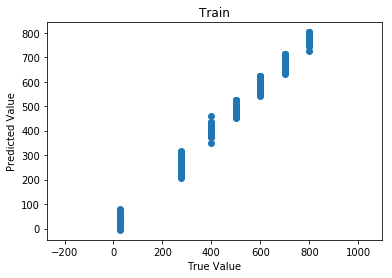

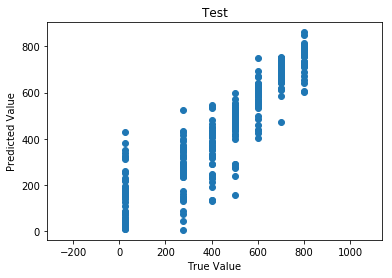

Ave train 25 =  40.71529
Ave test 25 =  139.51718
Ave train 275 =  272.73123
Ave test 275 =  269.7219
Ave train 400 =  401.19855
Ave test 400 =  358.53015
Ave train 500 =  489.52374
Ave test 500 =  458.8858
Ave train 600 =  590.27075
Ave test 600 =  578.13525
Ave train 700 =  687.44025
Ave test 700 =  686.61084
Ave train 800 =  780.51794
Ave test 800 =  759.3961


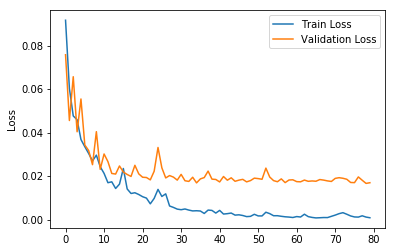

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import mean_squared_error

print('Training NN...')

model = Sequential()
model.add(Dense(1000, input_dim=Num_Points, activation='relu', name='FC1_plus_ReLU'))
model.add(Dense(800, activation='relu', name='FC2_plus_ReLU'))
model.add(Dense(1, name='Temperatrue_Output'))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs=80, batch_size=24)

pred_train = model.predict(X_train) 
pred_test = model.predict(X_test)

# scaling back the temperatures to the original values
pred_traininv = scaler.inverse_transform(pred_train)
train_inv = scaler.inverse_transform(y_train)
pred_testinv = scaler.inverse_transform(pred_test)
test_inv = scaler.inverse_transform(y_test)

# Calculating mse and rmse for train
mse_train = mean_squared_error(train_inv, pred_traininv)
print('RMSE - train = ', np.sqrt(mse_train))

# Calculating mse and rmse for test
mse_test = mean_squared_error(test_inv, pred_testinv)
print('RMSE = test = ', np.sqrt(mse_test))

# Make a plot of true vs predicted values for train
plt.scatter(train_inv, pred_traininv)
plt.axis('equal')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Train')
plt.show()

# Make a plot of true vs predicted values for test
plt.scatter(test_inv, pred_testinv)
plt.axis('equal')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Test')
plt.show()

# Using the function ave_temp from above to calculate average predicted temperatures with respect to original temperatures
ave_temp(pred_traininv, train_inv, pred_testinv, test_inv)

# Printing loss function of traininig and validation set. See "validation_split" in model.fit function.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Validation Loss'])
plt.show()

In [ ]:
# Printing model summary 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FC1_plus_ReLU (Dense)        (None, 1000)              1001000   
_________________________________________________________________
FC2_plus_ReLU (Dense)        (None, 800)               800800    
_________________________________________________________________
Temperatrue_Output (Dense)   (None, 1)                 801       
Total params: 1,802,601
Trainable params: 1,802,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Calculating Pearson correlation coefficient between true temperature values vs predicted values for training and testing.
corr_coeff_train = np.corrcoef(train_inv[:,0], pred_traininv[:,0])[0,1]
print('Pearson correlation coefficient Train', corr_coeff_train)
corr_coeff_test = np.corrcoef(test_inv[:,0], pred_testinv[:,0])[0,1]
print('Pearson correlation coefficient Test', corr_coeff_test)

Pearson correlation coefficient Train 0.9978978473465066
Pearson correlation coefficient Test 0.9127022288937179


## Artificial Neural Network for Regression (1D-CNN). Ref. 2

### Here, we demonstarte how to build an artificial neural network in Keras, specifically, 1D-CNN. Here, we take the final architecture as we used in the manuscript. Note: Different run will give slightly different results due to ramdomness of the ANN weights initialization and other randomness involved in the machine learning pipeline.

In [ ]:
data_set_processed = pd.read_csv('data_set_processed.csv', index_col=False)
data_set_processed = data_set_processed.drop('Unnamed: 0', axis=1)

## Getting the features, X (intensities) and target, y (temperatrues)

In [ ]:
X = data_set_processed.iloc[:,2:].to_numpy()
y = np.array(data_set_processed.Temperature)
y = np.expand_dims(y,1)

## Taking regions from the spectra that correspond to the peaks regions mentioned in Ref. 2 (highlighted in the color horizontal lines)

Chosen Spectra is:  326


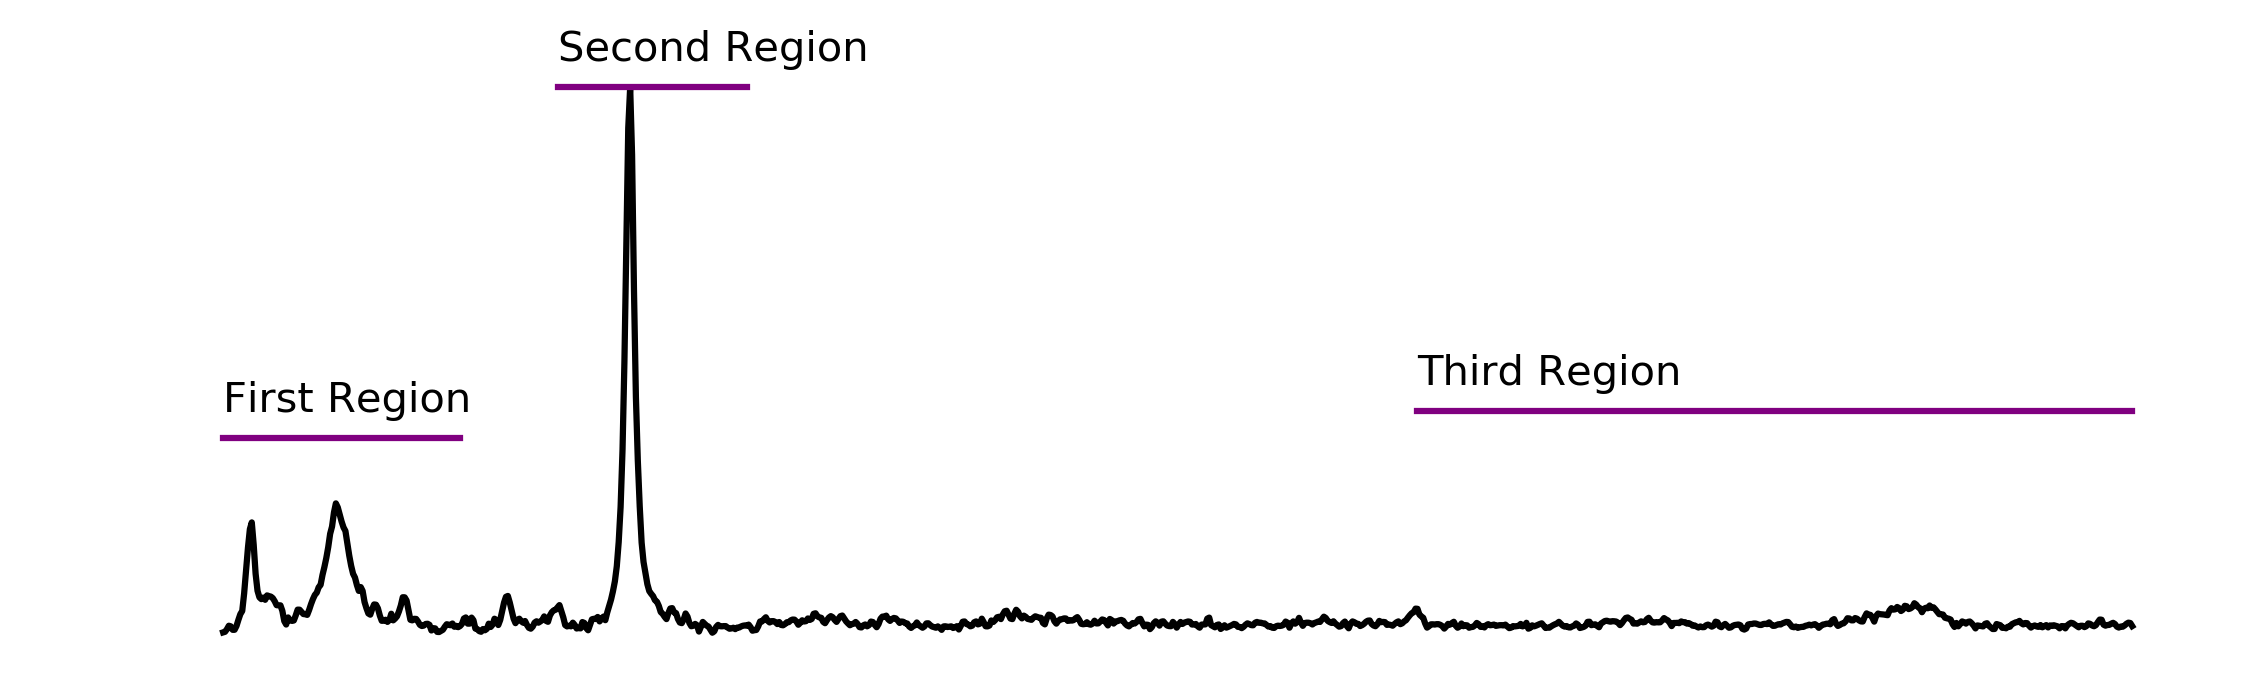

In [ ]:
Num_Points = 1000

rand_spec = np.random.randint(X.shape[0])

print('Chosen Spectra is: ', rand_spec)

fig = plt.figure(dpi=300, frameon=False)
fig.set_size_inches(7,2)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
ax.plot(X[rand_spec,:], color='black')
plt.ylabel('X', fontsize=20)
plt.yticks(ticks=[], labels=[])
plt.xticks(ticks=[], labels=[])
plt.plot(range(0,125), 0.35 * np.ones(125) ,color='purple')
ax.annotate(s='First Region',xy=(50, 0.45), xytext=(0, 0.4))
plt.plot(range(175,275), 1.0 * np.ones(100) ,color='purple')
ax.annotate(s='Second Region',xy=(175, 1.05), xytext=(175, 1.05))
plt.plot(range(625,1000), 0.4 * np.ones(375) ,color='purple')
ax.annotate(s='Third Region',xy=(625, 0.45), xytext=(625, 0.45))
plt.show()

In [ ]:
X_1 = X[:,0:125]
X_2 = X[:,175:275]
X_3 = X[:,625:]
X_new = np.concatenate((X_1, X_2, X_3), axis=1)

print('Shape of X: ', X_new.shape)

Shape of X:  (1629, 600)


Chosen Spectra is:  899


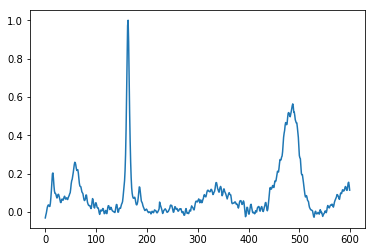

In [ ]:
# Printing random spectra
rand_spec = np.random.randint(0,X_new.shape[0])
print('Chosen Spectra is: ', rand_spec)

plt.plot(X_new[rand_spec,:])
plt.show()

## Scaling the target with "MinMaxScaler"
The target value range is a few order of magnitude larger than the feature values range. So to make the process more robust the target is scaled to be between 0-1.

In [ ]:
scaler = MinMaxScaler()
y_s = scaler.fit_transform(y)

## Splitting the data set into training and testing sets

### Note, in the original work more validations methods and analyses and models applied. Here, we demonstrate a simple train test split.. Such a split is over optimistic, and for better validation strategies and explanations see SI in Ref. 1. 

In [ ]:
rnd_seed = 97
X_train, X_test, y_train, y_test = train_test_split(X_new, y_s, shuffle=True, test_size=0.2,
                                                    random_state=rnd_seed, stratify=y_s)

## Add a channel to the training data so it fits to the 1D-CNN model requirenments

In [ ]:
X_train = np.expand_dims(X_train,2)
X_test = np.expand_dims(X_test,2)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (1303, 600, 1)
X_test shape: (326, 600, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from keras.optimizers import Adam
from keras.layers import ReLU
from sklearn.metrics import mean_squared_error, mean_absolute_error

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1_plus_ReLU (Conv1D)     (None, 560, 16)           672       
_________________________________________________________________
MaxPool1 (MaxPooling1D)      (None, 280, 16)           0         
_________________________________________________________________
Conv2_plus_ReLU (Conv1D)     (None, 240, 16)           10512     
_________________________________________________________________
MaxPool2 (MaxPooling1D)      (None, 120, 16)           0         
_________________________________________________________________
Conv3_plus_ReLU (Conv1D)     (None, 80, 32)            21024     
_________________________________________________________________
MaxPool3 (MaxPooling1D)      (None, 40, 32)            0         
_________________________________________________________________
Flatten (Flatten)            (None, 1280)              0         
__________

1303/1303 [==============================] - 1s 1ms/step - loss: 0.0075 - val_loss: 0.0140
Epoch 65/80
1303/1303 [==============================] - 1s 1ms/step - loss: 0.0066 - val_loss: 0.0174
Epoch 66/80
1303/1303 [==============================] - 1s 1ms/step - loss: 0.0059 - val_loss: 0.0150
Epoch 67/80
1303/1303 [==============================] - 1s 1ms/step - loss: 0.0062 - val_loss: 0.0148
Epoch 68/80
1303/1303 [==============================] - 1s 1ms/step - loss: 0.0059 - val_loss: 0.0126
Epoch 69/80
1303/1303 [==============================] - 1s 1ms/step - loss: 0.0056 - val_loss: 0.0122
Epoch 70/80
1303/1303 [==============================] - 1s 1ms/step - loss: 0.0041 - val_loss: 0.0149
Epoch 71/80
1303/1303 [==============================] - 1s 1ms/step - loss: 0.0057 - val_loss: 0.0155
Epoch 72/80
1303/1303 [==============================] - 1s 1ms/step - loss: 0.0045 - val_loss: 0.0130
Epoch 73/80
1303/1303 [==============================] - 1s 1ms/step - loss: 0.0037 -

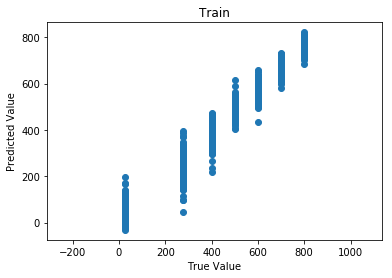

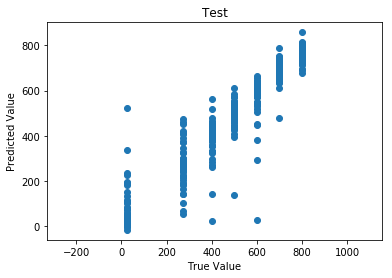

Ave train 25 =  34.033375
Ave test 25 =  73.56355
Ave train 275 =  258.1027
Ave test 275 =  275.01822
Ave train 400 =  392.9451
Ave test 400 =  383.16348
Ave train 500 =  488.84225
Ave test 500 =  484.73804
Ave train 600 =  586.44366
Ave test 600 =  562.78314
Ave train 700 =  677.91156
Ave test 700 =  685.28876
Ave train 800 =  766.72003
Ave test 800 =  768.94995


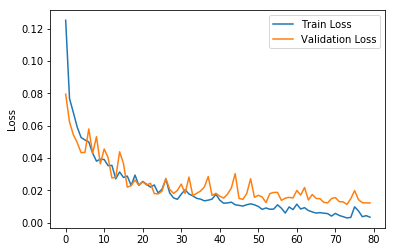

In [ ]:
# The model architecture chosen in Ref. 2 for the 1D-CNN model
model = Sequential()
model.add(Conv1D(filters=16, kernel_size=41, strides=1, padding='valid',
                 input_shape=(X_train.shape[1], X_train.shape[2],),
                 activation='relu', name='Conv1_plus_ReLU'))
model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid', name='MaxPool1'))
model.add(Conv1D(filters=16, kernel_size=41, strides=1, padding='valid', activation='relu', name='Conv2_plus_ReLU'))
model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid', name='MaxPool2'))
model.add(Conv1D(filters=32, kernel_size=41, strides=1, padding='valid', activation='relu', name='Conv3_plus_ReLU'))
model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid', name='MaxPool3'))
model.add(Flatten(name='Flatten'))
model.add(Dense(256, activation='relu', name='FC1_plus_ReLU'))
model.add(Dense(256, activation='relu', name='FC2_plus_ReLU'))
model.add(Dense(1, name='Temperature_Output'))

optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.summary()
history = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs=80, batch_size=24)

pred_train = model.predict(X_train) 
pred_test = model.predict(X_test)

# scaling back the temperatures to the original values
pred_traininv = scaler.inverse_transform(pred_train)
train_inv = scaler.inverse_transform(y_train)
pred_testinv = scaler.inverse_transform(pred_test)
test_inv = scaler.inverse_transform(y_test)

# Calculating mse and rmse for train
mse_train = mean_squared_error(train_inv, pred_traininv)
rmse_k_train = np.sqrt(mse_train)
print('RMSE - train = ', rmse_k_train)
# Calculating mse and rmse for test
mse_test = mean_squared_error(test_inv, pred_testinv)
rmse_k_test = np.sqrt(mse_test)
print('RMSE = test = ', rmse_k_test)

# Calculating mae
mae_train = mean_absolute_error(train_inv, pred_traininv)
print('MAE - train = ', mae_train)
# Calculating mae 
mae_test = mean_absolute_error(test_inv, pred_testinv)
print('MAE = test = ', mae_test)   

# Make a plot of true vs predicted values for train
plt.scatter(train_inv, pred_traininv)
plt.axis('equal')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Train')
plt.show()

# Make a plot of true vs predicted values for test
plt.scatter(test_inv, pred_testinv)
plt.axis('equal')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Test')
plt.show()

# Using the function ave_temp from above to calculate average predicted temperatures with respect to original temperatures
ave_temp(pred_traininv, train_inv, pred_testinv, test_inv)

# Printing loss function of traininig and validation set. See "validation_split" in model.fit function.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Validation Loss'])
plt.show()


In [ ]:
# Printing model summary 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1_plus_ReLU (Conv1D)     (None, 560, 16)           672       
_________________________________________________________________
MaxPool1 (MaxPooling1D)      (None, 280, 16)           0         
_________________________________________________________________
Conv2_plus_ReLU (Conv1D)     (None, 240, 16)           10512     
_________________________________________________________________
MaxPool2 (MaxPooling1D)      (None, 120, 16)           0         
_________________________________________________________________
Conv3_plus_ReLU (Conv1D)     (None, 80, 32)            21024     
_________________________________________________________________
MaxPool3 (MaxPooling1D)      (None, 40, 32)            0         
_________________________________________________________________
Flatten (Flatten)            (None, 1280)              0         
__________

In [ ]:
# Calculating Pearson correlation coefficient between true temperature values vs predicted values for training and testing.
corr_coeff_train = np.corrcoef(train_inv[:,0], pred_traininv[:,0])[0,1]
print('Pearson correlation coefficient Train', corr_coeff_train)
corr_coeff_test = np.corrcoef(test_inv[:,0], pred_testinv[:,0])[0,1]
print('Pearson correlation coefficient Test', corr_coeff_test)

Pearson correlation coefficient Train 0.9886755270069453
Pearson correlation coefficient Test 0.9387879693822136
